# Quick look at data from Neulog


In [5]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

# Check on Neulog files

In [6]:
def extractNeulog(fileloc,file,cols):
    # fileloc is the location of the file being evaluated, can be '.' if being run inside the folder with files
    # file is a neulog data file
    # cols is a list of string names for the recorded data in datafile ex: ["BVP","Resp","HR"]
    
    Feats = pd.read_csv(fileloc+file,skiprows=8,header=None) # this skips the first sample because they are ridiculous and make time -zero
    Feats = Feats.iloc[:-2,:] # drops the last two rows of metadata
    
    #prepare to convert their terrible time stamps
    time_0 = pd.to_datetime("00:00:00.0",format="%H:%M:%S.%f")
    #time_start = pd.to_datetime(file[:14],format="%Y%m%d%H%M%S")

    #datetimes = []
    stimtimes = []
    for r in range(len(Feats)):
        if len(Feats.loc[r,0])<12: # in case of madness
            if len(Feats.loc[r,0][1:].split('.'))>1:
                delt = pd.to_datetime(Feats.loc[r,0],format="'%H:%M:%S.%f")-time_0
            else:
                delt = pd.to_datetime(Feats.loc[r,0],format="'%H:%M:%S")-time_0
            #datetimes.append(delt+time_start)
            stimtimes.append(delt.total_seconds()) # this is a float
    
    k = len(stimtimes)
    
    nlFeats = pd.DataFrame()
    nlFeats['time'] = stimtimes
    for c in range(len(cols)):
        nlFeats[cols[c]] = pd.to_numeric(Feats.loc[:k,c+1], errors='coerce')
    #nlFeats['datetime'] = datetimes
    
    return nlFeats
    

In [7]:
dirs_loc = 'Set1/'
dirs = os.listdir(dirs_loc)
file_loc = dirs_loc + dirs[0]+'/'
files = os.listdir(file_loc)

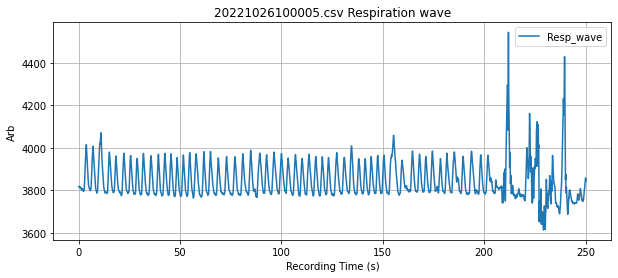

In [4]:
# example plot
file = files[7]
Feats=extractNeulog(file_loc,file,['Pulse_wave','Resp_wave'])
#Feats['Resp']
Feats.plot(x='time',y='Resp_wave',figsize=[10,4])
plt.grid()
plt.ylabel('Arb')
plt.xlabel('Recording Time (s)')
plt.title(file + ' Respiration wave')
plt.savefig('Set1_Neulog_RespPlots/'+'Resp_wave_'+file[:-4]+'.png')
plt.show()

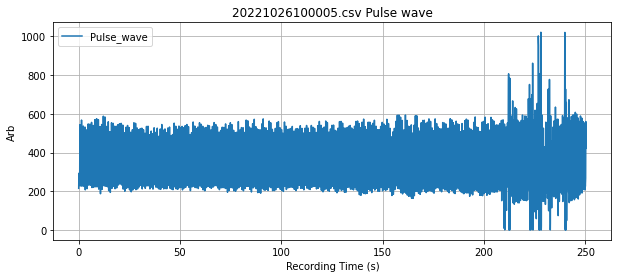

In [140]:
file = files[7]
Feats=extractNeulog(file_loc,file,['Pulse_wave','Resp_wave'])
#Feats['Resp']
Feats.plot(x='time',y='Pulse_wave',figsize=[10,4])
plt.grid()
plt.ylabel('Arb')
plt.xlabel('Recording Time (s)')
plt.title(file + ' Pulse wave')
plt.savefig('Set1_Neulog_PulsePlots/'+'Pulse_wave_'+file[:-4]+'.png')
plt.show()

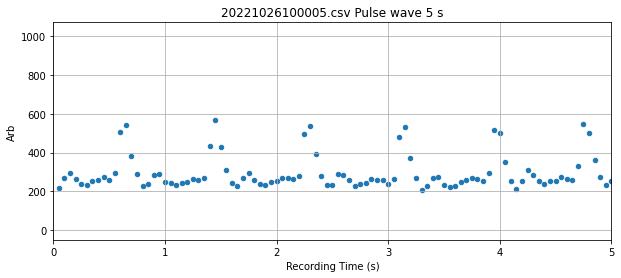

In [143]:
file = files[7]
Feats=extractNeulog(file_loc,file,['Pulse_wave','Resp_wave'])
#Feats['Resp']
Feats.plot.scatter(x='time',y='Pulse_wave',figsize=[10,4])
plt.grid()
plt.ylabel('Arb')
plt.xlabel('Recording Time (s)')
plt.xlim([0,5])
plt.title(file + ' Pulse wave 5 s')
plt.savefig('Set1_Neulog_PulsePlots/'+'5_s_Pulse_wave_'+file[:-4]+'.png')
plt.show()

# Convert neulog files to more easily machine read format



In [26]:
dirs_loc = 'Set1/'
dirs = os.listdir(dirs_loc)
file_loc = dirs_loc + dirs[0]+'/'
files = os.listdir(file_loc)

feature_cols = ['Pulse_wave','Resp_wave']

In [30]:
for d in dirs:
    if d.startswith('2022'): #probably an unconverted neulog datafile folder 
        file_loc = dirs_loc + d+'/'
        files = os.listdir(file_loc)

        for file in files:
            if file.startswith('2022'): #probably an unconverted neulog datafile    
                Feats=extractNeulog(file_loc,file,feature_cols) # extract and convert
                Feats.plot(x='time',y='Resp_wave',figsize=[12,4])
                plt.ylabel('Arb')
#                 plt.ylim([1400,2400])
                plt.xticks(np.arange(0,300,10))
                plt.xlim([0,300])
                plt.grid()
                plt.xlabel('Recording Time (s)')
                plt.title(file + ' Respiration wave')
                plt.savefig('Set1_Neulog_RespPlots/'+'Resp_wave_'+file[:-4]+'.png')
                plt.close()
                
                Feats.plot(x='time',y='Pulse_wave',figsize=[12,4])
                plt.xticks(np.arange(0,300,10))
                plt.xlim([0,300])
                plt.grid()
                plt.ylabel('Arb')
                plt.xlabel('Recording Time (s)')
                plt.title(file + ' Pulse wave')
                plt.savefig('Set1_Neulog_PulsePlots/'+'Pulse_wave_'+file[:-4]+'.png')
                plt.close()
                
                Feats.to_csv('Neulog_1/neulog_'+file,index=False) #save in new loc in new format


# HR test recordings


In [31]:
dirs = ['202211041900/']
file_loc = dirs[0]+'/'
files = os.listdir(file_loc)

feature_cols = ['HeartBMP','Resp_wave']

In [32]:
for file in files:
    if file.startswith('2022'): #probably an unconverted neulog datafile    
        Feats=extractNeulog(file_loc,file,feature_cols) # extract and convert
        Feats.plot(x='time',y='Resp_wave',figsize=[10,4])
        plt.grid()
        plt.ylabel('Arb')
        plt.xlabel('Recording Time (s)')
        plt.title(file + ' Respiration wave')
        plt.savefig('./misc_plots/'+'Resp_wave_'+file[:-4]+'.png')
        plt.close()

        Feats.plot(x='time',y='HeartBMP',figsize=[10,4])
        plt.grid()
        plt.ylabel('BPM')
        plt.xlabel('Recording Time (s)')
        plt.title(file + ' Heart Rate')
        plt.savefig('./misc_plots/'+'HeartBMP_'+file[:-4]+'.png')
        plt.close()

        Feats.to_csv('Neulog_1/neulog_'+file,index=False) #save in new loc in new format


In [33]:
np.arange(0,300,25)

array([  0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275])

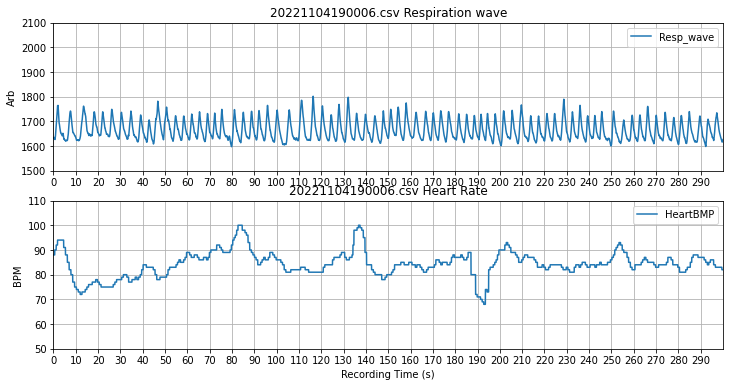

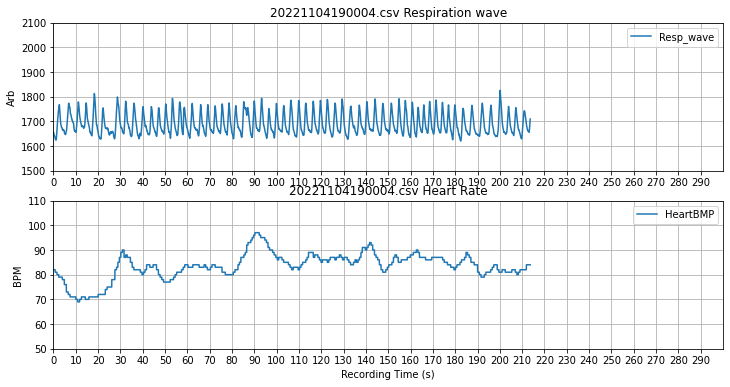

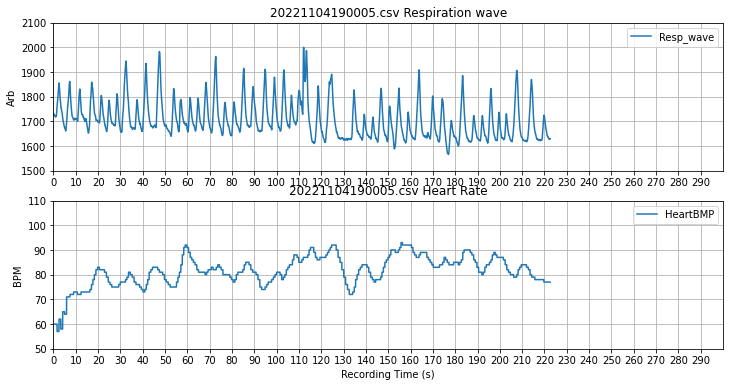

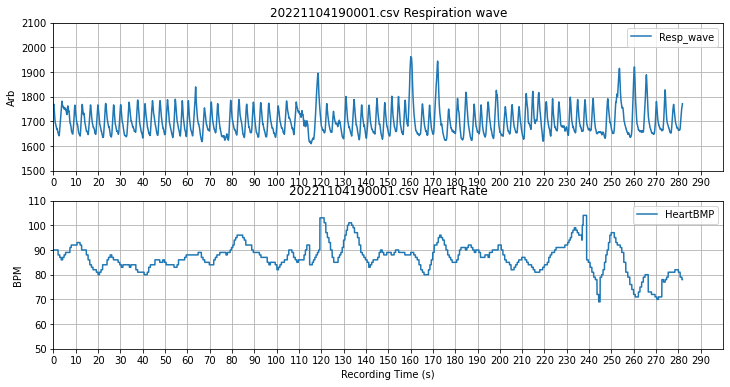

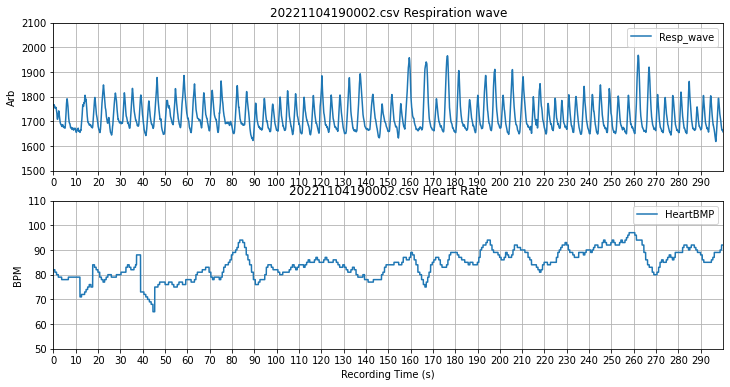

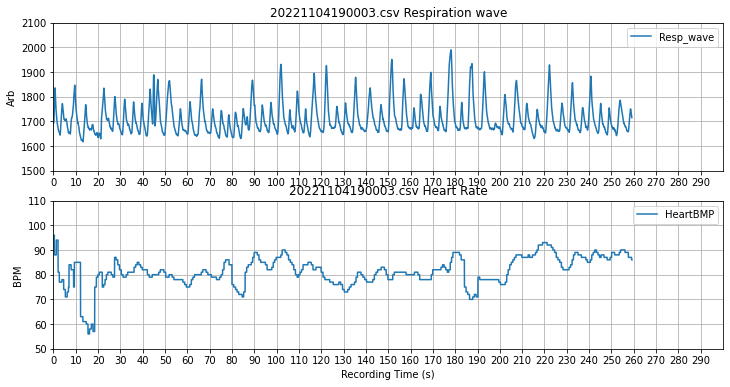

In [34]:
for file in files:
    if file.startswith('2022'): #probably an unconverted neulog datafile

        Feats=extractNeulog(file_loc,file,feature_cols) # extract and convert
        Feats = pd.read_csv('Neulog_1/neulog_'+file)
#            Feats = pd.read_csv(fileloc+file,skiprows=8,header=None) # this skips the first sample because they are ridiculous and make time -zero

        f, (ax1,ax2) = plt.subplots(2,1,figsize=(12,6))
        ax = ax1
        Feats.plot(x='time',y='Resp_wave',ax = ax)
        ax.grid(which='both')
        ax.set_ylabel('Arb')
        ax.set_ylim([1500,2100])
        ax.set_xticks(np.arange(0,300,10))
        ax.set_xlim([0,300])
        ax.set_xlabel('')
        ax.set_title(file + ' Respiration wave')
        
        ax = ax2
        Feats.plot(x='time',y='HeartBMP',ax = ax)
        ax.grid(which='both')
        ax.set_ylabel('BPM')
        ax.set_ylim([50,110])
        ax.set_xticks(np.arange(0,300,10))
        ax.set_xlim([0,300])
        ax.set_xlabel('Recording Time (s)')
        ax.set_title(file + ' Heart Rate')
        
        plt.savefig('./misc_plots/'+'raw_signals_'+file[:-4]+'.png')
        plt.show()
#        plt.close()

#        Feats.to_csv('Neulog_1/neulog_'+file,index=False) #save in new loc in new format


In [21]:
Feats

,time,HeartBMP,Resp_wave
0,0.05,96.0,1693.0
1,0.10,96.0,1693.0
2,0.15,96.0,1695.0
3,0.20,96.0,1699.0
4,0.25,96.0,1708.0
...,...,...,...
5178,258.95,87.0,1728.0
5179,259.00,87.0,1723.0
5180,259.05,86.0,1720.0
5181,259.10,86.0,1717.0


In [25]:
# Heart rate BMP reports IBI it seems, no smoothing, to unit of BPM. 
# Sampling pulse wave captures IBI at sample rate of 20 Hz. So granularity much higher, unless averaged:
60/np.arange(0.5,1,0.05)

array([120.        , 109.09090909, 100.        ,  92.30769231,
        85.71428571,  80.        ,  75.        ,  70.58823529,
        66.66666667,  63.15789474])

# First recording test

In [23]:
Feats = pd.read_csv('../test_1_Uta/Uta - heart & breath.csv')
# had to export the .xcl file to csv and edit out the extra 
# formating lines and some quirks with how time is recorded. (removed random negative time, and added decimal to minute value. why drope the decimal?!?)
# *grumble* we have standardisation for formats for a reasons. 
pd.to_datetime(Feats.loc[:,'Time'],format='%H:%M:%S.%f')
Feats = Feats.set_index('Time',drop = True)

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

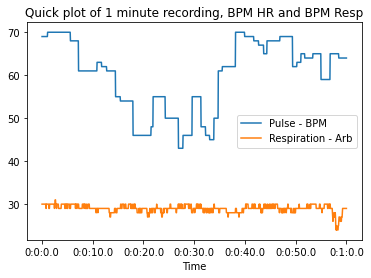

In [26]:
Feats.plot()
plt.title('Quick plot of 1 minute recording, BPM HR and BPM Resp')
plt.savefig('/test_1_Uta/Quick_plot_Uta.png',dpi = 300)
plt.show()